Read from mongo

In [2]:
from pymongo import MongoClient
# pprint library is used to make the output look more pretty
from pprint import pprint
# connect to MongoDB, change the << MONGODB URL >> to reflect your own connection string
client = MongoClient('localhost',27017)
db=client.admin
# Issue the serverStatus command and print the results
serverStatusResult=db.command("serverStatus")
pprint(serverStatusResult)

{'asserts': {'msg': 0, 'regular': 0, 'rollovers': 0, 'user': 10, 'warning': 0},
 'connections': {'active': 3,
                 'available': 999994,
                 'awaitingTopologyChanges': 2,
                 'current': 6,
                 'exhaustHello': 0,
                 'exhaustIsMaster': 1,
                 'totalCreated': 7},
 'electionMetrics': {'averageCatchUpOps': 0.0,
                     'catchUpTakeover': {'called': 0, 'successful': 0},
                     'electionTimeout': {'called': 0, 'successful': 0},
                     'freezeTimeout': {'called': 0, 'successful': 0},
                     'numCatchUps': 0,
                     'numCatchUpsAlreadyCaughtUp': 0,
                     'numCatchUpsFailedWithError': 0,
                     'numCatchUpsFailedWithNewTerm': 0,
                     'numCatchUpsFailedWithReplSetAbortPrimaryCatchUpCmd': 0,
                     'numCatchUpsSkipped': 0,
                     'numCatchUpsSucceeded': 0,
                     'numC

In [3]:
import json
db = client['Tweets_db']
collection_tweets = db['AllTweets']


In [4]:
db.AllTweets.find({'retweet_count':{'$gt':10}})[1]

{'_id': ObjectId('606505e198f67bd20a050692'),
 'created_at': 'Fri Oct 23 17:08:49 +0000 2020',
 'id': 1319687233453002755,
 'id_str': '1319687233453002755',
 'full_text': "Leo's activities with Honest Elections Project are despicable. His group is advancing crackpot theories which could be used to try to get the courts, which he helped to stack with conservatives, to accept sham voter fraud arguments which could affect voting outcomes. /4",
 'truncated': False,
 'display_text_range': [0, 270],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': 1319686885149556736,
 'in_reply_to_status_id_str': '1319686885149556736',
 'in_reply_to_user_id': 47034524,
 'in_reply_to_user_id_str': '47034524',
 'in_reply_to_screen_name': 'rickhasen',
 'user': {'id': 47034524,
  'id_str': '47034524',
  'name': 'Rick Hasen',
  'screen_name': 'rickhasen',
  'location': 'St

In [11]:
collectionweets = collection_tweets.find()

In [6]:
collection_tweets.find({"retweeted_status":{"$exists":True}}).count()

<ipython-input-6-fcd258fd2182>:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  collection_tweets.find({"retweeted_status":{"$exists":True}}).count()


0

In [7]:
import sys
import json
import networkx
import optparse
import itertools
import time

from networkx import nx_pydot
from networkx.readwrite import json_graph
G = networkx.DiGraph()
optionsusers,optionshashtags,optionsretweets=False,False,True

In [8]:
def add(from_user, from_id, to_user, to_id, type, created_at=None):
    "adds a relation to the graph"
    # storing start_data will allow for timestamps for gephi timeline, where nodes will appear on screen at their start dataset
    # and stay on forever after

    if (optionsusers or optionshashtags) and to_user:
        G.add_node(from_user, screen_name=from_user, start_date=created_at)
        G.add_node(to_user, screen_name=to_user, start_date=created_at)

        if G.has_edge(from_user, to_user):
            weight = G[from_user][to_user]['weight'] + 1
        else:
            weight = 1
        G.add_edge(from_user, to_user, type=type, weight=weight)

    elif not optionsusers and to_id:
        G.add_node(from_id, screen_name=from_user, type=type)
        if to_user:
            G.add_node(to_id, screen_name=to_user)
        else:
            G.add_node(to_id)
        G.add_edge(from_id, to_id, type=type)

{'_id': ObjectId('6057aeddcc3f2977bd8695d4'), 'created_at': 'Sat May 01 16:31:05 +0000 2010', 'id': 13196877351, 'id_str': '13196877351', 'full_text': '@suyan5 おやすみなさい', 'truncated': False, 'display_text_range': [0, 15], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'suyan5', 'name': 'suyan', 'id': 519112743, 'id_str': '519112743', 'indices': [0, 7]}], 'urls': []}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 68410202, 'id_str': '68410202', 'name': 'shifuku', 'screen_name': '4_2_9', 'location': 'Tokyo', 'description': 'iPhone/MBP/Android(Pixel) etc.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 870, 'friends_count': 859, 'listed_count': 60, 'created_at': 'Mon Aug 24 13:44:05 +0000 2009', 'favourit

In [12]:
for t in collectionweets:
# for line in open('data/myfirsttweets.jsonl'):
#     try:
#         t = json.loads(line)
#     except:
#         continue
    from_id = t['id_str']
    from_user = t['user']['screen_name']
    from_user_id = t['user']['id_str']
    to_user = None
    to_id = None
    # standardize raw created at date to dd/MM/yyyy HH:mm:ss
    created_at_date = time.strftime('%d/%m/%Y %H:%M:%S', time.strptime(t["created_at"],'%a %b %d %H:%M:%S +0000 %Y'))
    if t.get('in_reply_to_status_id_str'):
            to_id = t['in_reply_to_status_id_str']
            to_user = t['in_reply_to_screen_name']
            add(from_user, from_id, to_user, to_id, "reply")

In [13]:
networkx.write_gexf(G, 'replies.gexf')

Replies graph

In [ ]:
import matplotlib
networkx.draw_random(G)

In [ ]:
import matplotlib
networkx.draw_spring(G)

In [24]:
from networkx.algorithms import approximation
from networkx.algorithms import community
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)
kernighan = community.girvan_newman(G)


In [25]:
 def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)            

In [26]:
communities = next(kernighan)
len(communities)

8401

Girvan newman

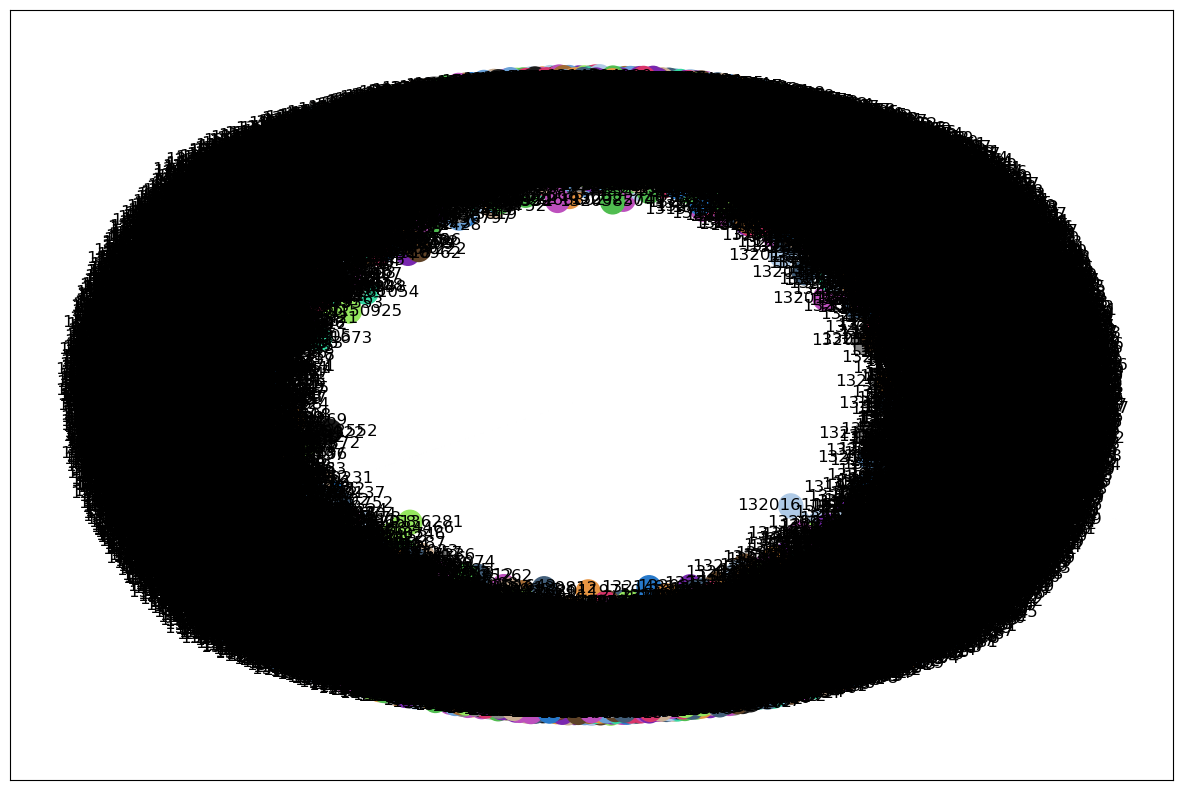

In [27]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]
# karate_pos = networkx.random_layout(G)
karate_pos = networkx.spring_layout(G)
# Draw external edges
networkx.draw_networkx(
    G, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
networkx.draw_networkx(
    G, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

Cliques

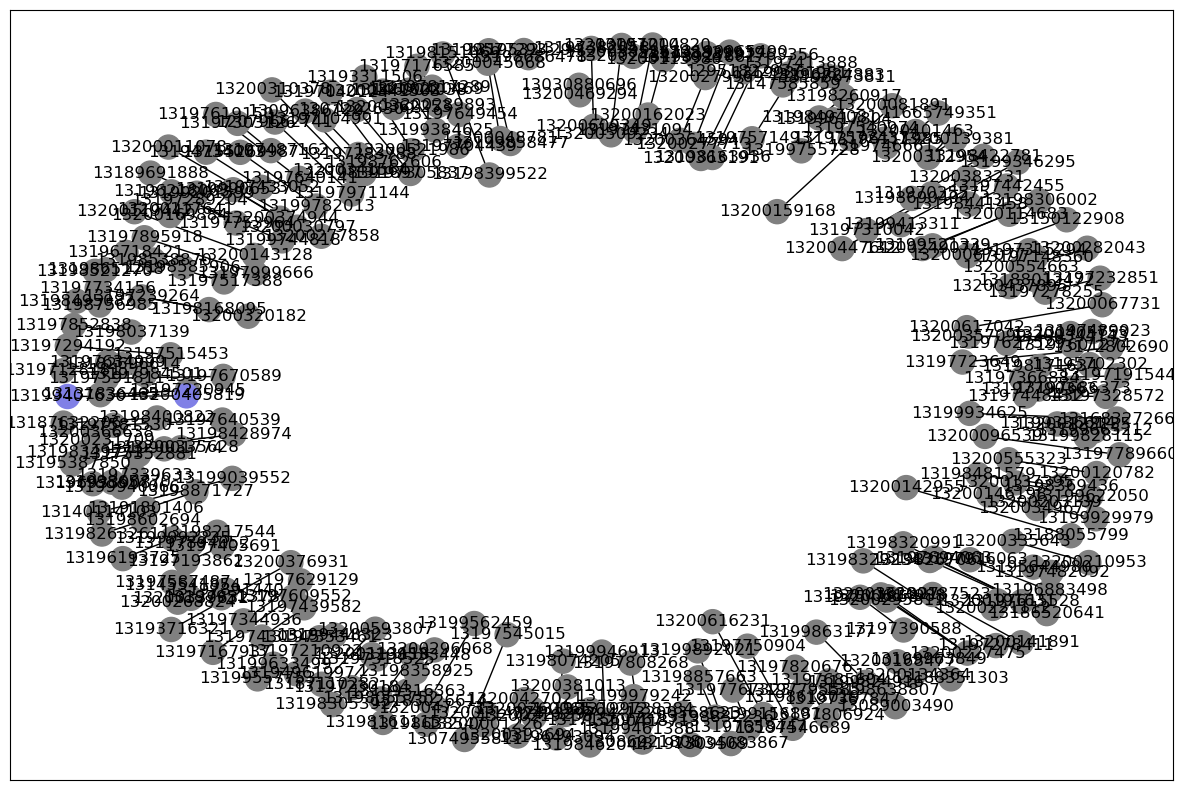

In [141]:
G_un = G.to_undirected()
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
cliques = list(networkx.find_cliques(G_un))
max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G_un.nodes()]
for i, v in enumerate(G_un.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
networkx.draw_networkx(G_un, node_color=node_color, pos=karate_pos)

Intento de infomap

In [74]:
import matplotlib.colors as colors
import networkx
import infomap

"""
Generate and draw a network with NetworkX, colored
according to the community structure found by Infomap.
"""

def findCommunities(G):
	"""
	Partition network with the Infomap algorithm.
	Annotates nodes with 'community' id and return number of communities found.
	"""
	conf = infomap.Infomap("--two-level")
	# Input data
	network = infomap.Network(conf);
	# Output data
# 	tree = infomap.tree(conf)

	print("Building network...")
	for e,v, in G.edges():
        network.addLink(e,v)
	network.finalizeAndCheckNetwork(True, nx.number_of_nodes(G))

	# Cluster network
	infomap.run(network, tree);

	print("Found %d top modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

	communities = {}
	clusterIndexLevel = 1 # 1, 2, ... or -1 for top, second, ... or lowest cluster level
	for node in tree.leafIter(clusterIndexLevel):
		communities[node.originalLeafIndex] = node.clusterIndex()

	nx.set_node_attributes(G, 'community', communities)
	return tree.numTopModules()


def drawNetwork(G):
	# position map
	pos = nx.spring_layout(G)
	# community ids
	communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
	numCommunities = max(communities) + 1
	# color map from http://colorbrewer2.org/
	cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
	cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

	# edges
	nx.draw_networkx_edges(G, pos)

	# nodes
	nodeCollection = nx.draw_networkx_nodes(G,
		pos = pos,
		node_color = communities,
		cmap = cmapLight
	)
	# set node border color to the darker shade
	darkColors = [cmapDark(v) for v in communities]
	nodeCollection.set_edgecolor(darkColors)

	# Print node labels separately instead
	for n in G.nodes_iter():
		plt.annotate(n,
			xy = pos[n],
			textcoords = 'offset points',
			horizontalalignment = 'center',
			verticalalignment = 'center',
			xytext = [0, 2],
			color = cmapDark(communities[n])
		)

	plt.axis('off')
	# plt.savefig("karate.png")
	plt.show()


G = networkx.read_gexf("retweetg.gexf")
numCommunities = findCommunities(G.to_undirected())

print("Number of communities found: %d" % numCommunities)

drawNetwork(G.to_undirected())

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-74-3f7a68feaa6d>, line 23)

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    infomapX = infomap.Infomap("--two-level")
    
    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
#         a,b=int(e[0])+ 2**32,int(e[1])+ 2**32
        a,b=int(e[0]),int(e[1])
        infomapX.addLink(a,b)
    print("Find communities with Infomap")
    infomapX.run()

    print("Found {} modules with codelength: {}".format(infomapX.numTopModules(), infomapX.codelength()))

    communities = {}
    for node in infomapX.iterLeafNodes():
        communities[node.physicalId] = node.moduleIndex()

    nx.set_node_attributes(G, values=communities, name='community')

def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()

G=nx.read_gexf('retweetg.gexf').to_undirected()

findCommunities(G)

drawNetwork(G)

Building Infomap network from a NetworkX graph...


TypeError: Wrong number or type of arguments for overloaded function 'InfomapWrapper_addLink'.
  Possible C/C++ prototypes are:
    infomap::InfomapWrapper::addLink(unsigned int,unsigned int,double)
    infomap::InfomapWrapper::addLink(unsigned int,unsigned int)
    infomap::InfomapWrapper::addLink(unsigned int,unsigned int,unsigned long)
